CAPÍTULO 11 - Tipo de dado datetime
-


Este capítulo ira abordar os tipos de dados datetime, e como podemos trablhar com datas e horas

Este capítulo abordará:

 1. A biblioteca embutida datetime de python
 2. conversão de strings em cada uma data
 3. Formatação de datas
 4. Extração dos componentes data
 5. Cálculos com datas
 6. Como trabalhar com datas em um DataFrame
 7. Reamostragem
 8. Como trabalhar com fusos horários

11.2 Objeto datetime de python

Python tem um objeto datetime embutito que se econtra na biblioteca datetime.  
O date time permite manipular datas e horas e até mesmo fazer cálculos com elas

In [431]:
from datetime import datetime

#obtém a data e hora atual
now = datetime.now()
print(now)

2024-06-21 17:25:10.796927


In [432]:
#podemos criar nosso próprio datetime manualmente

t1 = datetime.now()
t2 = datetime(2001, 9, 11, 9, 3)

print(t1)
print(t2)

2024-06-21 17:25:10.812533
2001-09-11 09:03:00


In [433]:
#operações matemáticas feitas com datas

diff = t1 - t2
print(diff)

8319 days, 8:22:10.812533


11.3 Converção para datetime

Para converter um object para datetime podemos usar a função to_datetime. Vamos usar o conjunto de dados ebola para fazer isso

In [434]:
import pandas as pd

ebola = pd.read_csv('../../data/country_timeseries.csv')

print(ebola.iloc[:5, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           NaN         8157.0                NaN
4  12/31/2014  284        2730.0         8115.0             9633.0


In [435]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

Podemos ver que a coluna date está codificada como um object genérico, logo podemos converter essa coluna para datetime

In [436]:
ebola['Date_dt'] = pd.to_datetime(ebola['Date'])

print(ebola.head())
print(ebola.info())

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0          

Também podemos ser um pouco mais explícitos em como converter um object para datetime.  
datetime possui um parâmetro chamado format que permite especificar o tipo da data, neste caso temo uma data mês/dia/ano

In [437]:
ebola['Date_dt'] = pd.to_datetime(ebola['Date'], format='%m/%d/%Y')

print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

datetime possui algumas opções embutidasd convenientes. Exemplo, podemos definir dayfirst ou yearfirst caso a data começe com o dia ou ano, 31-01-2009 ou 2009-01-31

Para outros tipos de datas podemos especificar manualmente como elas estão representadas

11.4 Carregando dados que incluam datas

A função read_csv tem muitos parâmetros, e um deles é o parse_date, que permite fazer o parse de um object para datetime diretamente na leitura do arquivo.
Basta passar o parâmetro e informar a coluna em que a data está

In [438]:
ebola = pd.read_csv('../../data/country_timeseries.csv', parse_dates=[0])

print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

11.5 Extraindo componentes de datas

Agora que temos um objeto datetime podemos extrair qualquer parte que quisermos dessa data

In [439]:
d = pd.to_datetime('2016-02-29')
print(d)

2016-02-29 00:00:00


In [440]:
#se a única string for passada teremos um Timestamp
print(type(d),'\n')

#podemos acessar os componentes da data
print(d.year, '\n')
print(d.month, '\n')
print(d.day)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 

2016 

2 

29


Vamos recriar a coluna date_dt para começar a manipular nossos dados do dataframe

In [441]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

print(ebola[['Date', 'date_dt']].head())

        Date    date_dt
0 2015-01-05 2015-01-05
1 2015-01-04 2015-01-04
2 2015-01-03 2015-01-03
3 2015-01-02 2015-01-02
4 2014-12-31 2014-12-31


In [442]:
#podemos criar novas colunas com ano mês e dia

ebola['year'], ebola['month'], ebola['day'] = (ebola['date_dt'].dt.year,
                                               ebola['date_dt'].dt.month,
                                               ebola['date_dt'].dt.day)

print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

        Date    date_dt  year  month  day
0 2015-01-05 2015-01-05  2015      1    5
1 2015-01-04 2015-01-04  2015      1    4
2 2015-01-03 2015-01-03  2015      1    3
3 2015-01-02 2015-01-02  2015      1    2
4 2014-12-31 2014-12-31  2014     12   31


Quando fizemos o parse de nossas datas o type não foi preservado

In [443]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

11.6 Cáculos com datas e timedeltas

Uma das vantagens de objetos do tipo data é que podemos fazer cálculos com eles.  
Nosso conjunto de dados possui uma coluna chamada Day que informa há quantos dias   
ocorre o surto de Ebola em um país. Podemos recrias essa coluna usando aritimética com datas

In [444]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


Se quisermos achar a data mais antiga, no caso do dataframe o primeiro dia de surto podemos usar a função min na coluna

In [445]:
print(ebola['date_dt'].min())

2014-03-22 00:00:00


In [446]:
#usando a data para cáculos
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

print(ebola[['Date', 'Day', 'outbreak_d']])

          Date  Day outbreak_d
0   2015-01-05  289   289 days
1   2015-01-04  288   288 days
2   2015-01-03  287   287 days
3   2015-01-02  286   286 days
4   2014-12-31  284   284 days
..         ...  ...        ...
117 2014-03-27    5     5 days
118 2014-03-26    4     4 days
119 2014-03-25    3     3 days
120 2014-03-24    2     2 days
121 2014-03-22    0     0 days

[122 rows x 3 columns]


In [447]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    datetime64[ns] 
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

Quando fazemos cálculos com objetos datetime obtemos um objeto timedelta

11.7 Métodos de datetime

Vamos observar outro conjunto de dados. Esse conjunto trata de falências bancárias

Date_format
-
    Nas versões atuais do Pandas ao ler um arquivo csv e passar as colunas, você precisa inserir um formato para elas usando 'date_format'  
    esse parâmetro aceita uma string única, informando o formato da data que será passado para todas as colunas, ou
    você pode optar por passar um dict com a coluna e o formato que ela recebe, ou o formato para uma lista das 
    colunas que vão receber

In [448]:
banks = pd.read_csv('../../data/banklist.csv', parse_dates=[5,6], date_format={'Closing Date': '%d-%b-%y', 'Updated Date': '%d-%b-%y'})
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB
None


In [449]:
banks = pd.read_csv('../../data/banklist.csv', parse_dates=[5,6], date_format='%d-%b-%y')
print(banks.head())
print(banks.info())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb   2017-05-26   2017-07-26  
1  30003  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26  
2  58302                         Whitney Bank   2017-04-28   2017-07-26  
3  35495                    Cache Valley Bank   2017-03-03   2017-05-18  
4  19328                  State Bank of Texas   2017-01-27   2017-05-18  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Dat

Agora podemos fazer parse das datas obtendo o trimestre e o ano em que o banco fechou

In [450]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter,
                                                   banks['Closing Date'].dt.year)

print(banks[['Closing Date','closing_quarter', 'closing_year']])

    Closing Date  closing_quarter  closing_year
0     2017-05-26                2          2017
1     2017-05-05                2          2017
2     2017-04-28                2          2017
3     2017-03-03                1          2017
4     2017-01-27                1          2017
..           ...              ...           ...
548   2001-07-27                3          2001
549   2001-05-03                2          2001
550   2001-02-02                1          2001
551   2000-12-14                4          2000
552   2000-10-13                4          2000

[553 rows x 3 columns]


In [451]:
#Também podemos cálcular quantos bancos fecharam no ano
closingYear = banks.groupby(['closing_year']).size()

print(closingYear)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64


In [452]:
#podemos ainda, cálcular quantos bancos fecharam em cada trimestre de cada ano
closingYear_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closingYear_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

Podemos plotar esses resultados

<function matplotlib.pyplot.show(close=None, block=None)>

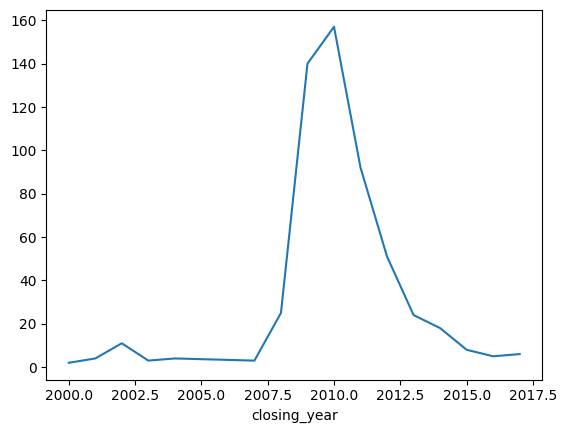

In [453]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = closingYear.plot()
plt.show

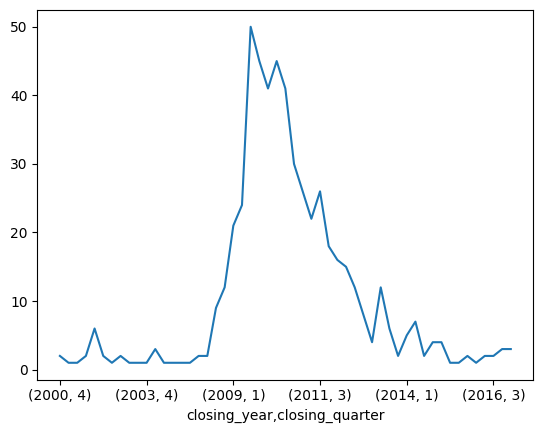

In [454]:
fig, ax = plt.subplots()
ax = closingYear_q.plot()
plt.show()

11.8 Obtendo dados de ações

Um tipo de dado comumente encontrado e que contém datas são os preçõs de ações. Felizmente Python tem um modo de obter esse tipo de dado por meio de programação

In [455]:
tesla = pd.read_csv('../../data/tesla_stock_yahoo.csv', parse_dates=[0])
print(tesla)

           Date        Open        High         Low       Close   Adj Close  \
0    2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1    2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2    2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3    2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4    2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...         ...         ...         ...         ...         ...         ...   
1786 2017-08-02  318.940002  327.119995  311.220001  325.890015  325.890015   
1787 2017-08-03  345.329987  350.000000  343.149994  347.089996  347.089996   
1788 2017-08-04  347.000000  357.269989  343.299988  356.910004  356.910004   
1789 2017-08-07  357.350006  359.480011  352.750000  355.170013  355.170013   
1790 2017-08-08  357.529999  368.579987  357.399994  365.220001  365.220001   

        Volume  
0     18766300  
1     17187100  


11.9 Obtendo subconjuntos de dados com base em datas

Agora sabendo como extrair parte de uma data, podemos fazer subconjuntos de nossos dados sem ter que fazer parse dos componentes individuais manualmente.

Caso quisermos dados somente de junho de 2010 no nosso conjunto de dados de proços das ações

In [456]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

        Date       Open   High        Low      Close  Adj Close    Volume
0 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100


11.9.1 Objeto DatetimeIndex

Uma coisa que podemos fazer, é transformar a coluna do index da linha em datas de uma outra coluna do dataframe.     
Isso pode facilitar nossa vida em alguns aspectos como fazer um subconjunto com datas

In [457]:
tesla.index = tesla['Date']

print(tesla.index)

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
               '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-07', '2017-08-08'],
              dtype='datetime64[ns]', name='Date', length=1791, freq=None)


In [458]:
#podemos obter um subconjunto de nossos dados com base no ano
#precisamos usar um .loc antes de passar o ano que queremos obter um subconjunto
print(tesla.loc['2015'].iloc[:5, :5])

                 Date        Open        High         Low       Close
Date                                                                 
2015-01-02 2015-01-02  222.869995  223.250000  213.259995  219.309998
2015-01-05 2015-01-05  214.550003  216.500000  207.160004  210.089996
2015-01-06 2015-01-06  210.059998  214.199997  204.210007  211.279999
2015-01-07 2015-01-07  213.350006  214.779999  209.779999  210.949997
2015-01-08 2015-01-08  212.809998  213.800003  210.009995  210.619995


11.9.2 Objeto TimedeltaIndex

Assim como fizemos com datetime podemos fazer com timedelta

In [459]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()

print(tesla.head())

                 Date       Open   High        Low      Close  Adj Close  \
Date                                                                       
2010-06-29 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999   
2010-06-30 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000   
2010-07-01 2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   
2010-07-02 2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   
2010-07-06 2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   

              Volume ref_date  
Date                           
2010-06-29  18766300   0 days  
2010-06-30  17187100   1 days  
2010-07-01   8218800   2 days  
2010-07-02   5139800   3 days  
2010-07-06   6866900   7 days  


In [460]:
tesla.set_index(tesla['ref_date'], inplace=True)

print(tesla.iloc[:5, :5])

               Date       Open   High        Low      Close
ref_date                                                   
0 days   2010-06-29  19.000000  25.00  17.540001  23.889999
1 days   2010-06-30  25.790001  30.42  23.299999  23.830000
2 days   2010-07-01  25.000000  25.92  20.270000  21.959999
3 days   2010-07-02  23.000000  23.10  18.709999  19.200001
7 days   2010-07-06  20.000000  20.00  15.830000  16.110001


In [461]:
#é possível selecionar os dados com base nos deltas
print(tesla['0 days' : '5 days'].iloc[:5, :5])

               Date       Open   High        Low      Close
ref_date                                                   
0 days   2010-06-29  19.000000  25.00  17.540001  23.889999
1 days   2010-06-30  25.790001  30.42  23.299999  23.830000
2 days   2010-07-01  25.000000  25.92  20.270000  21.959999
3 days   2010-07-02  23.000000  23.10  18.709999  19.200001


11.10 intervalos de datas

Nem todo conjunto de dados terá uma frequência fixa de valores. Por exemplo o conjunto de dados de ebola que não temos uma observação para cada dia do intervalo de datas

In [462]:
ebola = pd.read_csv('../../data/country_timeseries.csv', parse_dates=[0])

print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


Nesse caso 1015-01-01 não está em head e 2014-03-23 não está em tail

In [463]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


Uma prática comum é criar um intervalo de datas para reindexar um conjunto de dados com reindex

In [464]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [465]:
#vamos usar somente 5 linhas
ebola_5 = ebola.head()

ebola_5.set_index('Date', inplace=True)

print(ebola_5.iloc[:, :5])

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria
Date                                                                          
2015-01-05  289        2776.0            NaN            10030.0            NaN
2015-01-04  288        2775.0            NaN             9780.0            NaN
2015-01-03  287        2769.0         8166.0             9722.0            NaN
2015-01-02  286           NaN         8157.0                NaN            NaN
2014-12-31  284        2730.0         8115.0             9633.0            NaN


In [466]:
#agora podemos reindexar nossos dados com reindex
ebola_5.reindex(head_range)
print(ebola_5.iloc[:, :5])

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria
Date                                                                          
2015-01-05  289        2776.0            NaN            10030.0            NaN
2015-01-04  288        2775.0            NaN             9780.0            NaN
2015-01-03  287        2769.0         8166.0             9722.0            NaN
2015-01-02  286           NaN         8157.0                NaN            NaN
2014-12-31  284        2730.0         8115.0             9633.0            NaN


11.10.1 Frequências

Quando criamos head_range, a saída de print possuia um parâmetro chamado freq, que representa algum incremente em passos, neste caso era de dias 'D'.  
O livro tem uma tabela com as possíveis frequências

Esse parâmetro  pode ser chamado quando date_range é chamado.

In [467]:
#exemplo com a semana 01 de janeiro de 2017, que iníciou num domingo
#B = Frequência de dias úteis
print(pd.date_range('2017-01-01', '2017-01-07', freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


11.10.2 Offsets

Offsets são variações sobre uma frequencia base, onde você passa um valor em que as datas serão alternadas

In [468]:
#mostra os dias úteis pulando de 2 em 2
print(pd.date_range('2017-01-01', '2017-01-07', freq='2B'))

DatetimeIndex(['2017-01-02', '2017-01-04', '2017-01-06'], dtype='datetime64[ns]', freq='2B')


In [469]:
# especificando a primeira quinta feira de todo mês de 2017
print(pd.date_range('2017-01-01', '2017-12-31', freq='WOM-1THU'))

DatetimeIndex(['2017-01-05', '2017-02-02', '2017-03-02', '2017-04-06',
               '2017-05-04', '2017-06-01', '2017-07-06', '2017-08-03',
               '2017-09-07', '2017-10-05', '2017-11-02', '2017-12-07'],
              dtype='datetime64[ns]', freq='WOM-1THU')


In [470]:
#terceira sexta-feira de cada mês
print(pd.date_range('2017-01-01', '2017-12-31', freq='WOM-3FRI'))

DatetimeIndex(['2017-01-20', '2017-02-17', '2017-03-17', '2017-04-21',
               '2017-05-19', '2017-06-16', '2017-07-21', '2017-08-18',
               '2017-09-15', '2017-10-20', '2017-11-17', '2017-12-15'],
              dtype='datetime64[ns]', freq='WOM-3FRI')


11.11 Deslocando valores

Existem alguns motivos pelos quais podemos querer deslocar as datas de um certo valor, como talvez corrigir algum erro de média nos dados.

Apesar de ebola não estarem organizados (tidy data), uma das vantagens do formato atual é poder plotar o surto

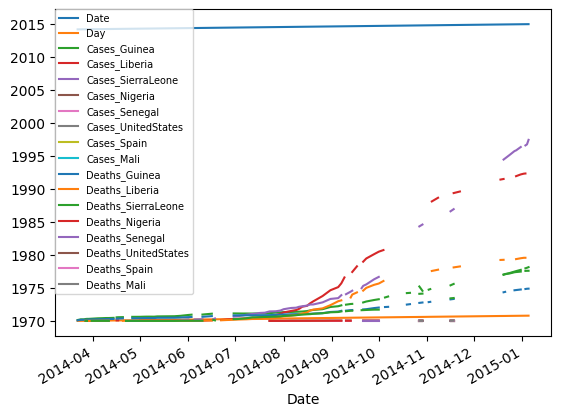

In [471]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.plot(ax=ax)
ax.legend(fontsize=7,
          loc=2,
          borderaxespad=0.)

plt.show()

Quando observamos um surto, uma informação útil é a rapidez com que o surto de espalha para outros países. Vamos olhar algumas colunas do nosso conjunto:

In [472]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


A data de início do surto é diferente em cada país, oque faz com que seja difícil acompanhar curvas entre os países

Queremos que todas as nossas datas tenham início em um dia 0 em comum, há alguns passo para fazer isso

Antes vamos criar uma nova copia de ebola mas com o index correto

In [473]:
ebola = pd.read_csv('../../data/country_timeseries.csv',
                    index_col='Date',
                    parse_dates=['Date'])
print(ebola.iloc[:, :4])
print(ebola.shape)

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                           
2015-01-05  289        2776.0            NaN            10030.0
2015-01-04  288        2775.0            NaN             9780.0
2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02  286           NaN         8157.0                NaN
2014-12-31  284        2730.0         8115.0             9633.0
...         ...           ...            ...                ...
2014-03-27    5         103.0            8.0                6.0
2014-03-26    4          86.0            NaN                NaN
2014-03-25    3          86.0            NaN                NaN
2014-03-24    2          86.0            NaN                NaN
2014-03-22    0          49.0            NaN                NaN

[122 rows x 4 columns]
(122, 17)


Em primeiro lugar, temos que criar um intervalo de datas para preencher todas as datas ausentes em nosso dataframe.  
Então quando deslocarmos os valores de nossas datas para baixo o número de dias pelo qual o dado será deslocado será igual o número de linhas que serão deslocadas.


In [474]:
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [475]:
#para corrigir isso podemos inverter a ordem do índicie
new_idx = reversed(new_idx)

Agora podemos reindexar nossos índicies de modo apropriado com reindex. Linhas de valores NaN serão criadas se o índicie ainda não estiver presente em nossos dados

In [476]:
ebola = ebola.reindex(new_idx)
print(ebola.shape)

(290, 17)


Se observarmos head e tail possuem valores que antes não existiam, ou seja, criaram novas linhas contendo valores NaN e na linha Date valores NaT (Not a Time)

In [477]:
print(ebola.iloc[:, :4])

              Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                             
2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01    NaN           NaN            NaN                NaN
...           ...           ...            ...                ...
2014-03-26    4.0          86.0            NaN                NaN
2014-03-25    3.0          86.0            NaN                NaN
2014-03-24    2.0          86.0            NaN                NaN
2014-03-23    NaN           NaN            NaN                NaN
2014-03-22    0.0          49.0            NaN                NaN

[290 rows x 4 columns]


Agora que criamos o intervalo de dados e o atribuímos a index, precisamos   
cácular a diferença entre a data mais antiga e a data mais antiga válida (Não nula) em nosso conjunto de dados

Para isso vamos usar os métodos de Series last_valid_index que obtém a data mais antiga válida no dataframe. Também existe uma função análoga que se chama first_valid_index

In [479]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [481]:
#Agora a data mais antiga do nosso cunjunto de dados
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [482]:
shift_values = last_valid - earliest_date
print(shift_values)

Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


Por fim, podemos iterar sobre cada coluna usando o método shift apra deslocar as colunas pelo valor correspondente em shift_values.

In [484]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values.iloc[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

In [488]:
#como temos um dict com valores podemos converter ele para um dataframe
ebola_shift = pd.DataFrame(ebola_dict)

In [489]:
#os objetos dict não são ordenados, então podemos passar a possição das colunas originais para reordenar novamente
ebola_shift = ebola_shift[ebola.columns]

In [491]:
#Podemos observar que agora o a última linha de cada coluna do dataframe possui um valor, ou seja, fora apropriadamente deslocados
print(ebola_shift.tail())

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                              
2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23  NaN           NaN            3.0                2.0   
2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN          NaN   
2014-03-22            0.0            1.0                 1.0        

11.12 Reamostragem